In [9]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import os 
import cv2

ROOT_PATH = Path('/mnt/2021_NIA_data/projects/nbb')
VIDEO_PATH = ROOT_PATH.joinpath("video/raw_data")

try:
    PROJECT_PATH = Path(__file__).parents[1]
except NameError:
    PROJECT_PATH = Path(os.getcwd()).parents[0]

IMAGE_PATH = Path(PROJECT_PATH, "images")

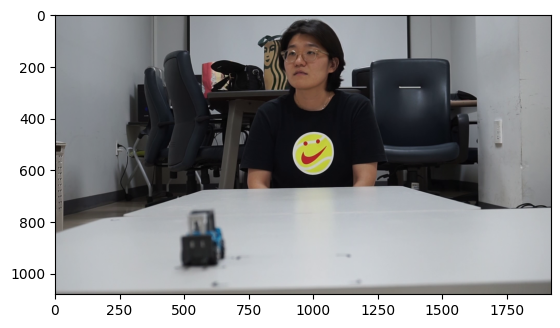

True

In [14]:
cap = cv2.VideoCapture(str(VIDEO_PATH.joinpath("td001.mp4")))

frame_number = 150
fc = 0
ret = True

while fc < frame_number and ret:
    ret, frame = cap.read()
    fc += 1

cap.release()

# Now frame contains the 150th frame of the video
video_image = frame

# Converting BGR image to RGB
video_image_rgb = cv2.cvtColor(video_image, cv2.COLOR_BGR2RGB)

plt.imshow(video_image_rgb)
plt.show()

# Save the image as jpg to 'images' folder (keep as BGR for OpenCV functions)

cv2.imwrite(str(Path(IMAGE_PATH).joinpath("rgb_video_image.jpg")), video_image_rgb)

In [11]:
# Memory issue if run this way

cap = cv2.VideoCapture(str(VIDEO_PATH.joinpath("td001.mp4")))
frameCount = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
frameWidth = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frameHeight = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

buf = np.empty((frameCount, frameHeight, frameWidth, 3), np.dtype("uint8"))

fc = 0
ret = True

while fc < frameCount and ret:
    ret, buf[fc] = cap.read()
    fc += 1

cap.release()

video_array = np.transpose(buf, (0, 3, 2, 1))

frame_number = 150

video_image = video_array[frame_number]  # Indexing frame

# Converting BGR image to RGB
video_image_rgb = cv2.cvtColor(video_image, cv2.COLOR_BGR2RGB)

plt.imshow(video_image_rgb)
plt.show()

# Save the image as jpg to 'images' folder (keep as BGR for OpenCV functions)
cv2.imwrite(Path(IMAGE_PATH).joinpath("rgb_video_image.jpg"), video_image)

MemoryError: Unable to allocate 61.7 GiB for an array with shape (10649, 1080, 1920, 3) and data type uint8

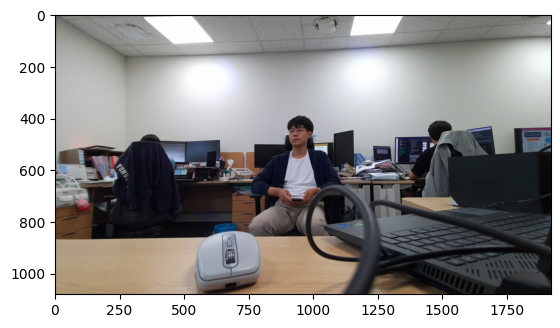

In [3]:
COLOR_PATH = ROOT_PATH.joinpath("video/proc_data/color")

color_video = np.load(COLOR_PATH.joinpath("td011_color.npy"))

frame_number = 50

color_image = color_video[frame_number]  # Indexing frame

plt.imshow(color_image)
plt.show()

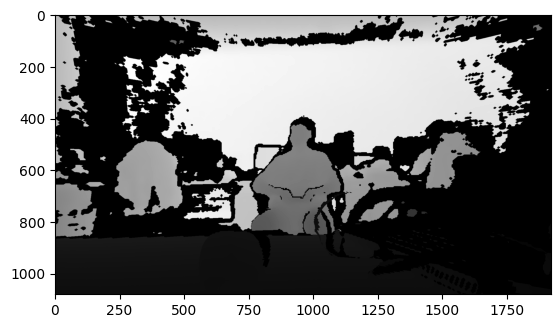

In [4]:
DEPTH_PATH = ROOT_PATH.joinpath("video/proc_data/depth")

depth_video = np.load(DEPTH_PATH.joinpath("td011_depth.npy"))

frame_number = 50

depth_image = depth_video[frame_number]  # Indexing the 10th frame

plt.imshow(depth_image, cmap='gray')
plt.show()